<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
import pandas as pd
import numpy as np

rng = np.random.default_rng(7)

df = pd.read_csv('/DMV_Written_Tests.csv')
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

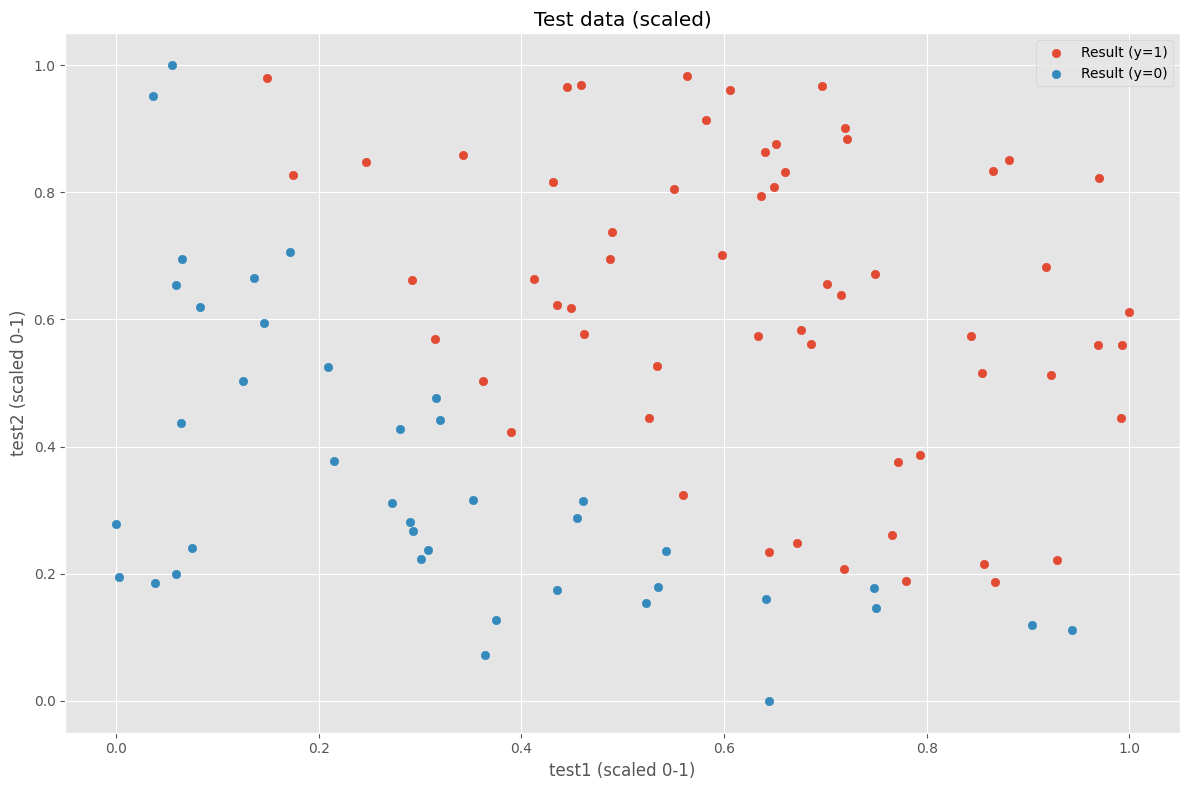

In [ ]:
def minmax(a: np.ndarray):
    return (a - a.min()) / (a.max() - a.min())

test1 = minmax(df['DMV_Test_1'].values)
test2   = minmax(df['DMV_Test_2'].values)
y      = df['Results'].values.astype(float)

X = np.column_stack([test1, test2])  # shape (n, 2)

# Quick scatter
plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Result (y=1)')
plt.scatter(X[y==0,0], X[y==0,1], label='Result (y=0)')
plt.xlabel('test1 (scaled 0-1)')
plt.ylabel('test2 (scaled 0-1)')
plt.legend()
plt.title('Test data (scaled)')
plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def predict_proba(W, b, X):
    return sigmoid(X @ W + b)


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def log_loss(p, y):
    eps = 1e-12
    p = np.clip(p, eps, 1-eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))


def gradients(W, b, X, y):
    p = predict_proba(W, b, X)
    diff = (p - y)        # shape (n,)
    dW = (X.T @ diff) / X.shape[0]
    db = np.mean(diff)
    return dW, db, p


In [ ]:
rng = np.random.default_rng(0)
W = rng.normal(0, 0.01, size=2)
b = 0.0
lr = 0.5
epochs = 80

print('Initial W:', W)
print('Initial b:', b)

Initial W: [ 0.0012573  -0.00132105]
Initial b: 0.0


### Task 6: Cost and Gradient at Initialization
---

In [ ]:
# Compute current loss and one GD step
dW, db, p = gradients(W, b, X, y)
before = log_loss(p, y)

W = W - lr * dW
b = b - lr * db

dW2, db2, p2 = gradients(W, b, X, y)
after = log_loss(p2, y)

print('dW (first step):', dW)
print('db (first step):', db)
print('loss before:', round(before, 4), ' -> loss after:', round(after, 4))
print('W after one step:', W, '  b:', round(b, 4))

dW (first step): [-0.12902617 -0.12018596]
db (first step): -0.10001199779277359
loss before: 0.6931  -> loss after: 0.6743
W after one step: [0.06577039 0.05877193]   b: 0.05


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
hist = []
for ep in range(epochs):
    dW, db, p = gradients(W, b, X, y)
    loss = log_loss(p, y)
    hist.append((ep, W.copy(), b, loss))
    W -= lr * dW
    b -= lr * db
    if ep % 10 == 0 or ep == epochs-1:
        print(f'epoch {ep:3d} | loss={loss:.4f} | W={W} | b={b:.4f}')

# Save history as a small DataFrame
hist_df = pd.DataFrame({
    "epoch": [h[0] for h in hist],
    "w1": [h[1][0] for h in hist],
    "w2": [h[1][1] for h in hist],
    "b":  [h[2] for h in hist],
    "loss": [h[3] for h in hist],
})
hist_df.tail()


epoch   0 | loss=0.6743 | W=[0.12240177 0.11088673] | b=0.0857
epoch  10 | loss=0.6154 | W=[0.48176471 0.42409951] | b=0.0786
epoch  20 | loss=0.5882 | W=[0.72474158 0.62392707] | b=-0.1089
epoch  30 | loss=0.5641 | W=[0.9415337  0.80195641] | b=-0.3100
epoch  40 | loss=0.5425 | W=[1.14466603 0.97050635] | b=-0.5033
epoch  50 | loss=0.5231 | W=[1.33665083 1.13167613] | b=-0.6866
epoch  60 | loss=0.5055 | W=[1.51855055 1.28611254] | b=-0.8603
epoch  70 | loss=0.4896 | W=[1.69117812 1.43424433] | b=-1.0250
epoch  79 | loss=0.4766 | W=[1.83922211 1.56249181] | b=-1.1662


,epoch,w1,w2,b,loss
75,75,1.757799,1.491819,-1.088523,0.482260
76,76,1.774246,1.506067,-1.104210,0.480824
77,77,1.790611,1.520259,-1.119819,0.479402
78,78,1.806895,1.534393,-1.135349,0.477993
79,79,1.823099,1.548470,-1.150803,0.476597


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

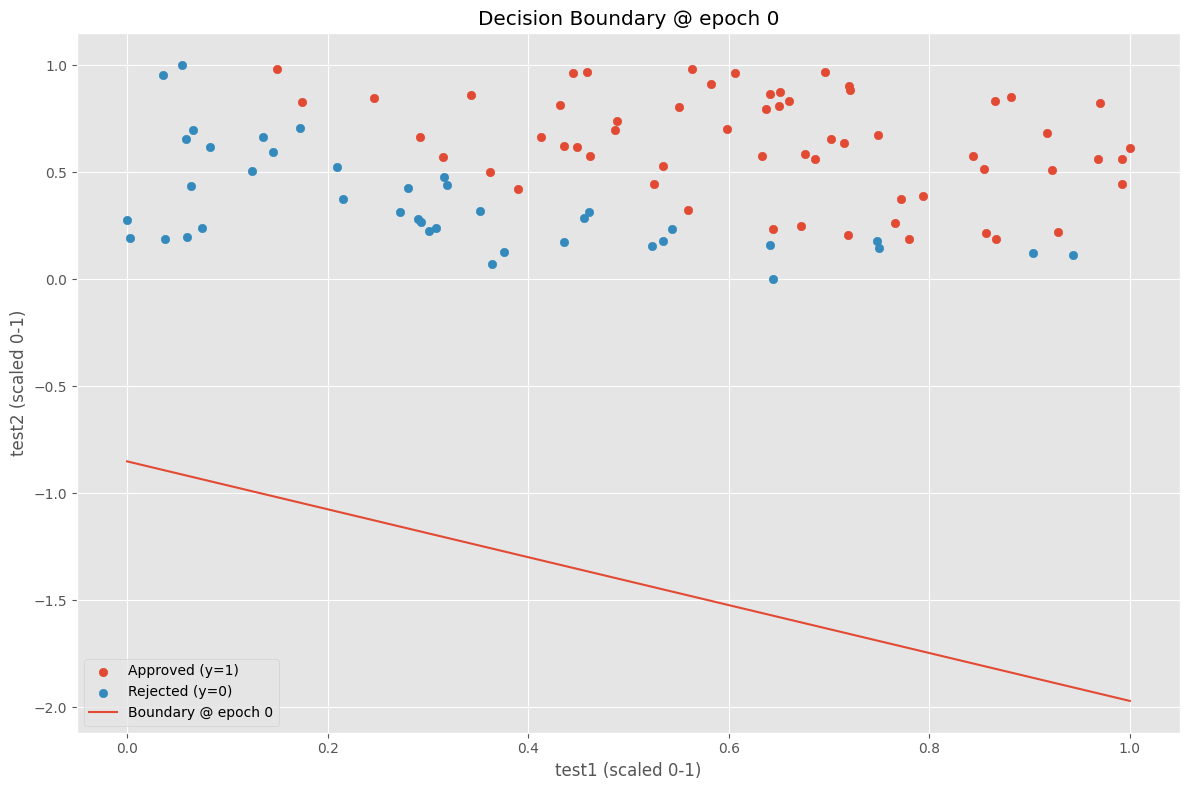

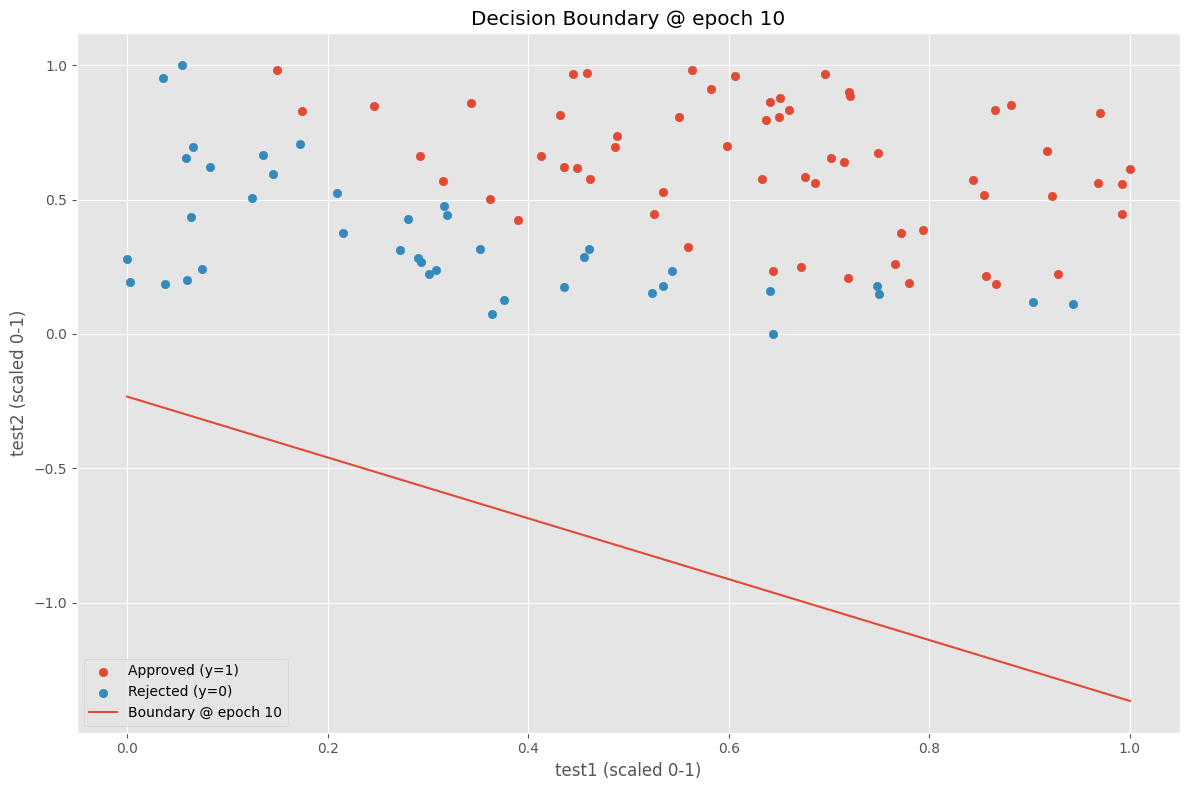

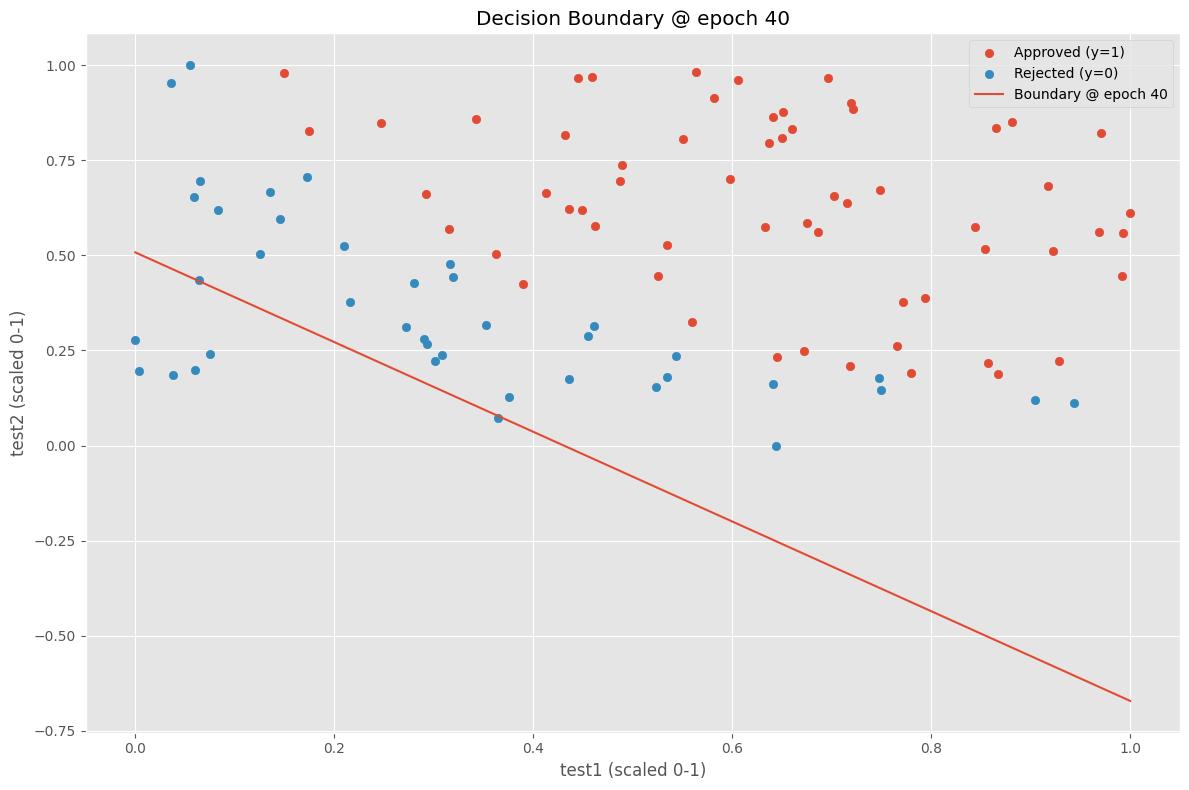

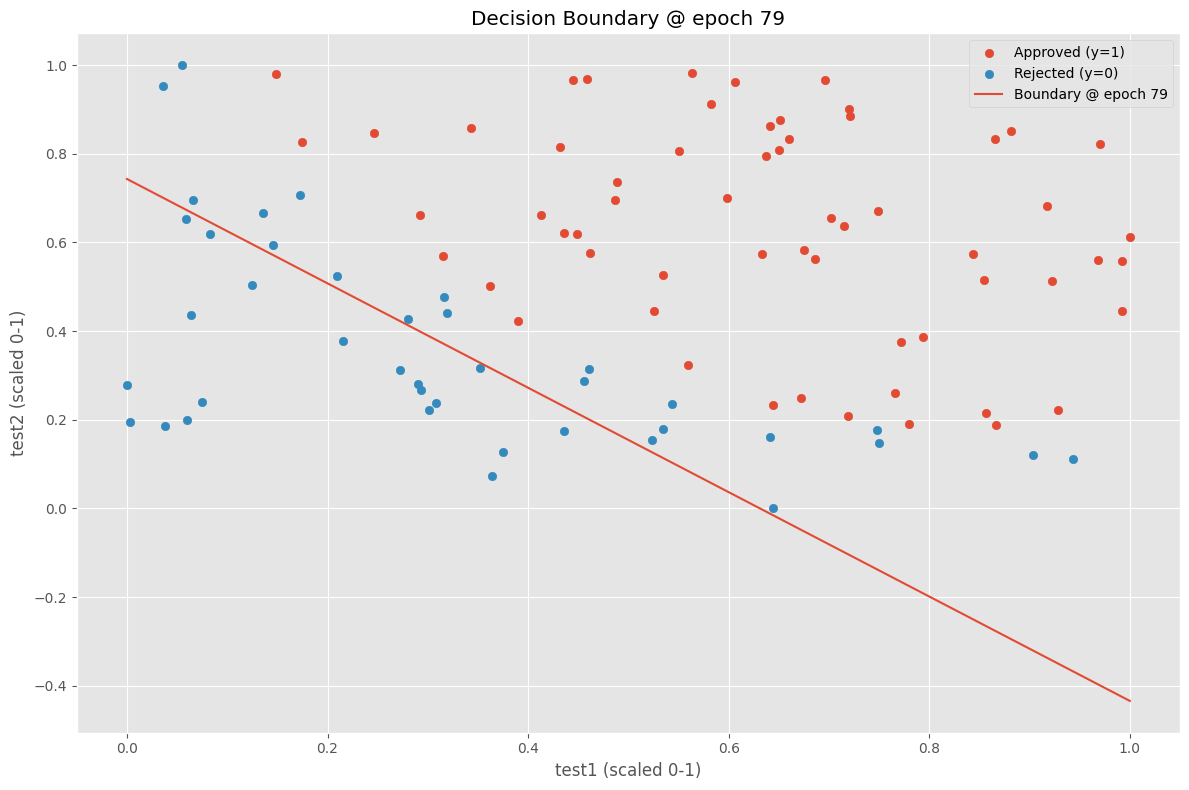

In [ ]:
def boundary_points(w, b, x1_min=0.0, x1_max=1.0, num=200):
    x1 = np.linspace(x1_min, x1_max, num=num)
    if abs(w[1]) < 1e-12:
        x1_line = np.full_like(x1, -b/(w[0] if abs(w[0])>1e-12 else 1e-12))
        x2_line = np.linspace(0.0, 1.0, num=num)
        return x1_line, x2_line
    x2 = -(w[0]/w[1])*x1 - b/w[1]
    return x1, x2

# Show boundary at a few epochs (0, 10, 40, last)
snapshots = [0, 10, 40, hist_df['epoch'].iloc[-1]]
for ep in snapshots:
    row = hist_df.loc[hist_df['epoch']==ep].iloc[0]
    w = np.array([row['w1'], row['w2']])
    b_ep = row['b']
    x1_line, x2_line = boundary_points(w, b_ep)
    plt.figure()
    plt.scatter(X[y==1,0], X[y==1,1], label='Result (y=1)')
    plt.scatter(X[y==0,0], X[y==0,1], label='Result (y=0)')
    plt.plot(x1_line, x2_line, label=f'Boundary @ epoch {ep}')
    plt.xlabel('test1 (scaled 0-1)')
    plt.ylabel('test2 (scaled 0-1)')
    plt.title(f'Decision Boundary @ epoch {ep}')
    plt.legend()
    plt.tight_layout()
    plt.show()


Loss curve

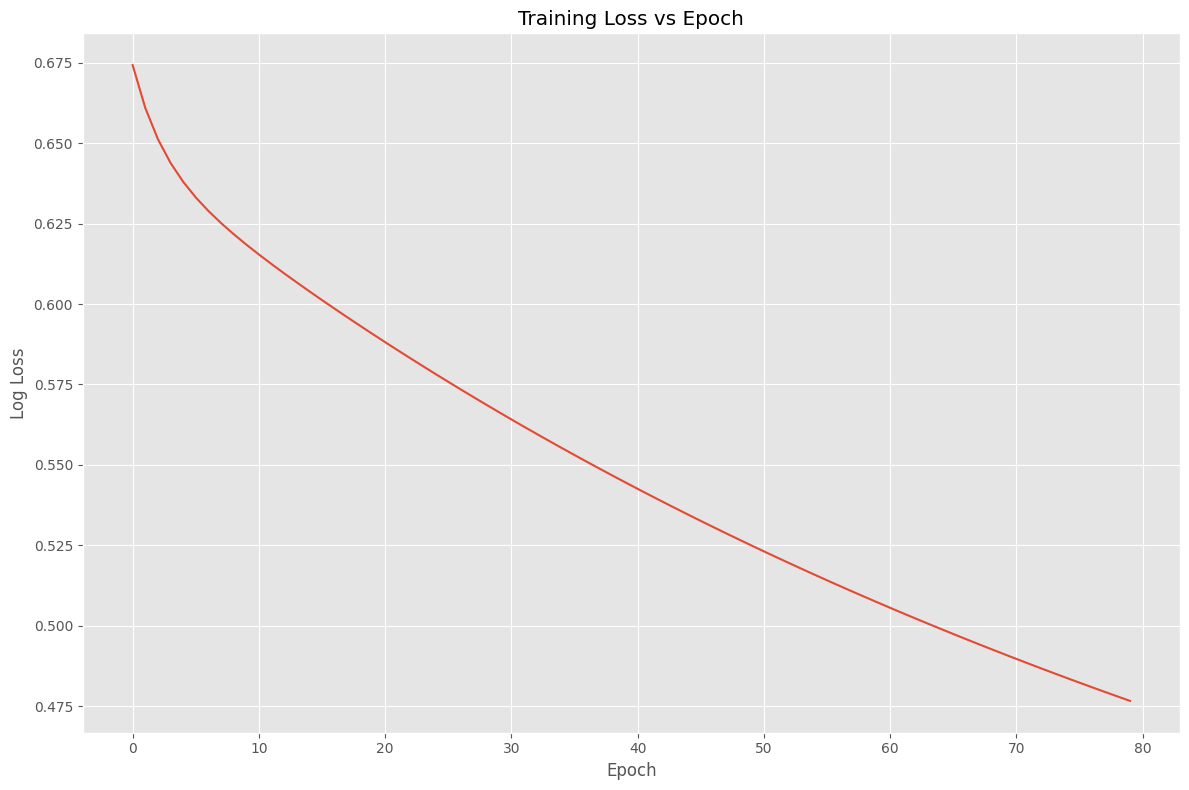

In [ ]:
plt.figure()
plt.plot(hist_df['epoch'].values, hist_df['loss'].values)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss vs Epoch')
plt.tight_layout()
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

Final Accuracy


In [ ]:
p_final = predict_proba(W, b, X)
y_pred  = (p_final >= 0.5).astype(int)
acc = (y_pred == y).mean()
print('Final W:', W, '  b:', round(b,4))
print(f'Training accuracy: {acc*100:.2f}%')


Final W: [1.83922211 1.56249181]   b: -1.1662
Training accuracy: 79.00%
